In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [52]:
# Load the dataset
df = pd.read_csv("Iris.csv")

In [53]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
40,5.0,3.5,1.3,0.3,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
127,6.1,3.0,4.9,1.8,Iris-virginica
45,4.8,3.0,1.4,0.3,Iris-setosa
75,6.6,3.0,4.4,1.4,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
96,5.7,2.9,4.2,1.3,Iris-versicolor
22,4.6,3.6,1.0,0.2,Iris-setosa
89,5.5,2.5,4.0,1.3,Iris-versicolor


In [55]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [56]:
features = df.columns[:-1]
target = df.columns[-1]

In [57]:
X = df[features]
y = df[target]


In [58]:
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = y.map(species_map)

In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
#Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(f'Accuracy: {accuracy_log_reg:.2f}')
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [62]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'Accuracy: {accuracy_knn:.2f}')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
Accuracy: 1.00
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [63]:
#  Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf:.2f}')
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier
Accuracy: 1.00
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



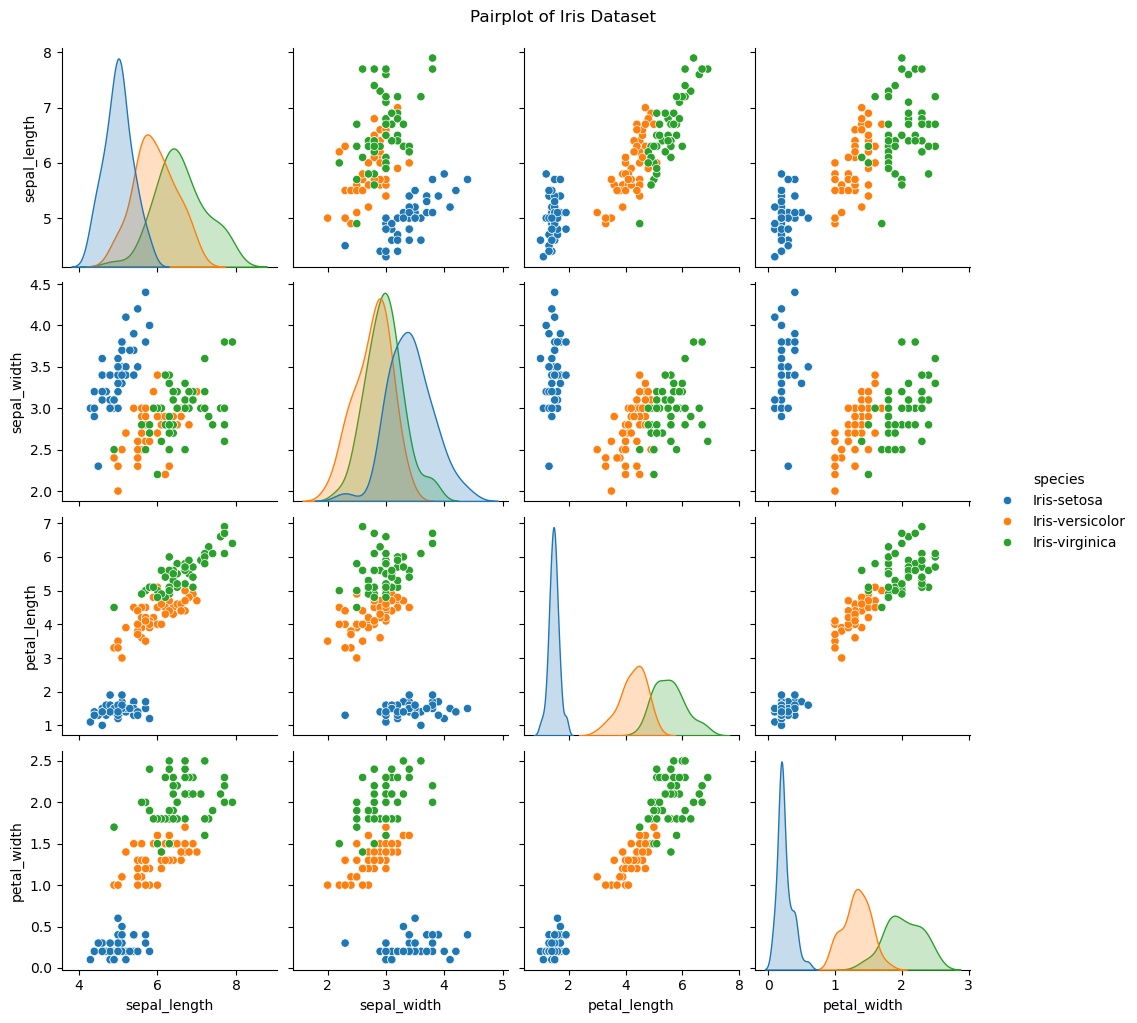

In [64]:
sns.pairplot(df, hue='species')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()


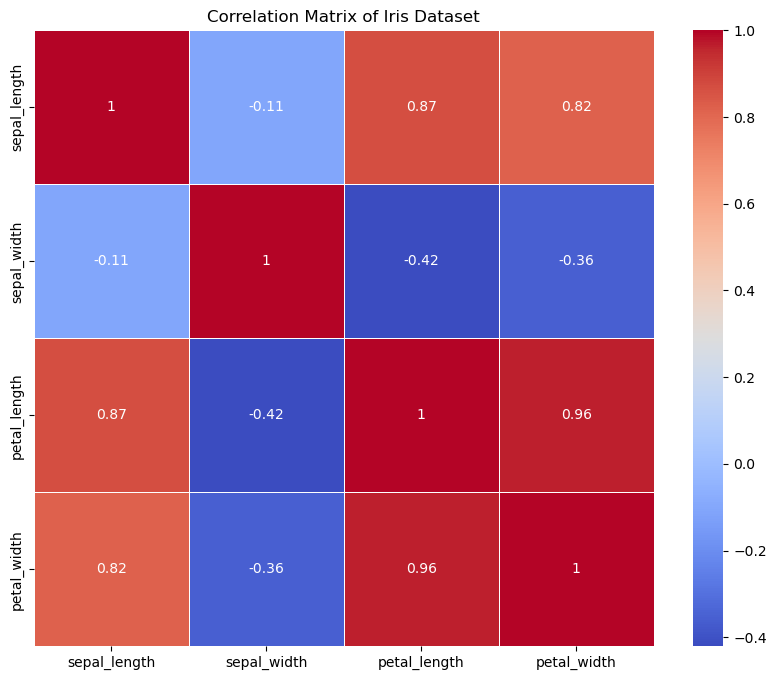

In [65]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop('species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Iris Dataset')
plt.show()


In [66]:
# Feature importance from Random Forest
importances = rf.feature_importances_
features = iris.feature_names
indices = np.argsort(importances)[::-1]

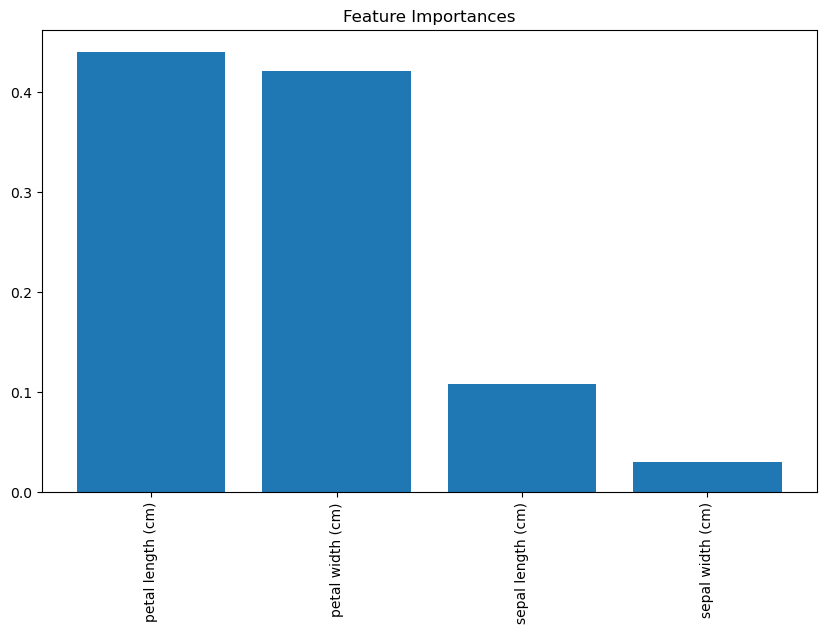

In [67]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

In [73]:
# Predict on new input using KNN
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  
sample = scaler.transform(sample)
prediction = knn.predict(sample)
predicted_species = {v: k for k, v in species_map.items()}[prediction[0]]
print(f'The predicted species for the sample {sample} is {predicted_species}')

The predicted species for the sample [[-0.86445224  0.99542457 -1.33462153 -1.30948358]] is Iris-setosa


In [74]:
# Predict on new input using 
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  
sample = scaler.transform(sample)
prediction = knn.predict(sample)
predicted_species = {v: k for k, v in species_map.items()}[prediction[0]]
print(f'The predicted species for the sample {sample} is {predicted_species}')

The predicted species for the sample [[-0.86445224  0.99542457 -1.33462153 -1.30948358]] is Iris-setosa


In [78]:
# Predict on new input using Logistic Regression
sample = np.array([[3.2,5,3,6.7]])  
sample = scaler.transform(sample)
prediction = log_reg.predict(sample)
predicted_species = {v: k for k, v in species_map.items()}[prediction[0]]
print(f'The predicted species for the sample {sample} is {predicted_species}')

The predicted species for the sample [[-3.18049351  4.36974517 -0.41715882  7.35376659]] is Iris-virginica
